# K-Means Clustering

Las distancias entre los kluster es la máxima, mientras que para cada kluster, la distancia entre los puntos es mínima.

[_diagrama de Voronoi_](https://es.wikipedia.org/wiki/Pol%C3%ADgonos_de_Thiessen)

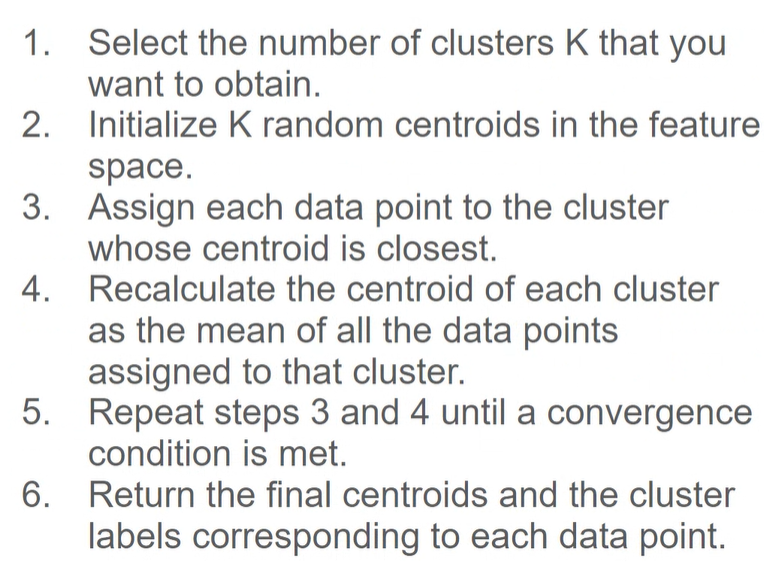

Las herramientas para identificar el número de kluster son la gráfica del codo o el metodo de silueta.

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
np.random.seed(100)
# Se genera un arreglo de 100 filas y dos columnas con númeos aleatorios ente (0, 1).
X = np.random.rand(100, 2)

In [5]:
X.shape

(100, 2)

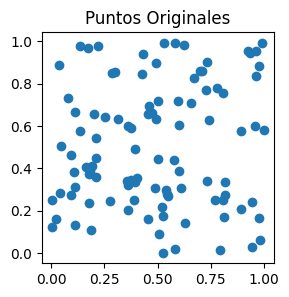

In [6]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:,0], X[:,1])
plt.title("Puntos Originales")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5,
                n_init=20,            # Cantidad de veces que recalculara los centroides
                random_state = 23)

kmeans.fit(X)

KMeans(n_clusters=5, n_init=20, random_state=23)

In [21]:
# Etiqueta de cluster para cada punto
labels = kmeans.labels_
labels

array([0, 1, 2, 4, 2, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 4, 2, 1, 3, 4, 4, 0,
       2, 3, 1, 4, 1, 0, 2, 2, 1, 0, 4, 0, 0, 2, 1, 4, 3, 2, 0, 1, 0, 4,
       1, 0, 2, 1, 1, 1, 4, 0, 4, 4, 3, 2, 4, 2, 0, 1, 1, 0, 0, 0, 0, 2,
       3, 2, 4, 4, 1, 0, 3, 4, 2, 2, 4, 0, 0, 0, 2, 1, 4, 0, 4, 2, 0, 4,
       0, 1, 4, 0, 1, 1, 3, 1, 4, 1, 4, 2], dtype=int32)

In [12]:
# Coordenas de los centroides
centroides = kmeans.cluster_centers_
centroides

array([[0.48653358, 0.26899107],
       [0.32274469, 0.77674351],
       [0.13081481, 0.33278494],
       [0.85687872, 0.1954738 ],
       [0.79612937, 0.80516802]])

In [13]:
vor = Voronoi(kmeans.cluster_centers_)

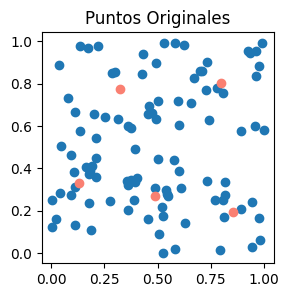

In [16]:
plt.figure(figsize=(3, 3))
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroides[:,0], centroides[:,1], color="salmon")
plt.title("Puntos Originales")
plt.show()

## Gráfica de los resultados

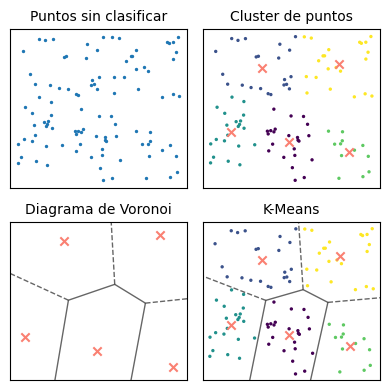

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(4, 4))

axs[0,0].scatter(X[:, 0], X[:, 1], s = 2)
axs[0,0].set_title("Puntos sin clasificar", size = 10)
axs[0,0].xaxis.set_ticks([])
axs[0,0].yaxis.set_ticks([])

axs[0,1].scatter(X[:, 0], X[:, 1], s = 2, c = labels)
axs[0,1].scatter(centroides[:, 0], centroides[:, 1], marker = "x", color = "salmon")
axs[0,1].set_title("Cluster de puntos", size = 10)
axs[0,1].xaxis.set_ticks([])
axs[0,1].yaxis.set_ticks([])

fig = voronoi_plot_2d(vor, ax=axs[1,0],
                      show_vertices=False,
                      line_color="gray",
                      line_alpha=0.6,
                      show_points=False)
axs[1,0].scatter(centroides[:, 0], centroides[:, 1], marker = "x", color = "salmon")
axs[1,0].set_title("Diagrama de Voronoi", size = 10)
axs[1,0].xaxis.set_ticks([])
axs[1,0].yaxis.set_ticks([])

axs[1,1].scatter(X[:, 0], X[:, 1], s = 2, c = labels)
axs[1,1].scatter(centroides[:, 0], centroides[:, 1], marker = "x", color = "salmon")
fig = voronoi_plot_2d(vor, ax=axs[1,1],
                      show_vertices=False,
                      line_color="gray",
                      line_alpha=0.6,
                      show_points=False)
axs[1,1].axis(xmin=-0.04, xmax=1.04, ymin=-0.04, ymax=1.04)
axs[1,1].set_title("K-Means", size = 10)
axs[1,1].xaxis.set_ticks([])
axs[1,1].yaxis.set_ticks([])

plt.tight_layout()
plt.show()